# **PART A**

---


> **DOMAIN**: Electronics and Telecommunication

---





> **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.


---



> **DATA DESCRIPTION:** The data set contains information on various signal tests performed:
1. **Parameters:** Various measurable signal parameters.
2. **Signal_Quality:** Final signal strength or quality.


---



> **PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.


---



> **STEPS AND TASKS:**



---



>## **1. Data import and Understanding**


---



>>### **A. Read the ‘Signals.csv’ as DataFrame and import required libraries**


---







In [24]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/My Drive/Colab Notebooks/NN Project Data - Signal.csv'

# Read the CSV file as a DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Display the DataFrame
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.shape

(1599, 12)

>>### **B. Check for missing values and print percentage for each attribute.**


---



In [27]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values for each attribute
percentage_missing = (missing_values / len(df)) * 100

# Print percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
print(percentage_missing)


Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


There are no missing values in the dataset.

>>### **C. Check for presence of duplicate records in the dataset and impute with appropriate method.**


---



In [28]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]

In [29]:
duplicate_rows

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [30]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(1359, 12)

The duplicate values in the dataset have been dropped.

>>### **D. Visualise distribution of the target variable.**


---



In [32]:
df['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

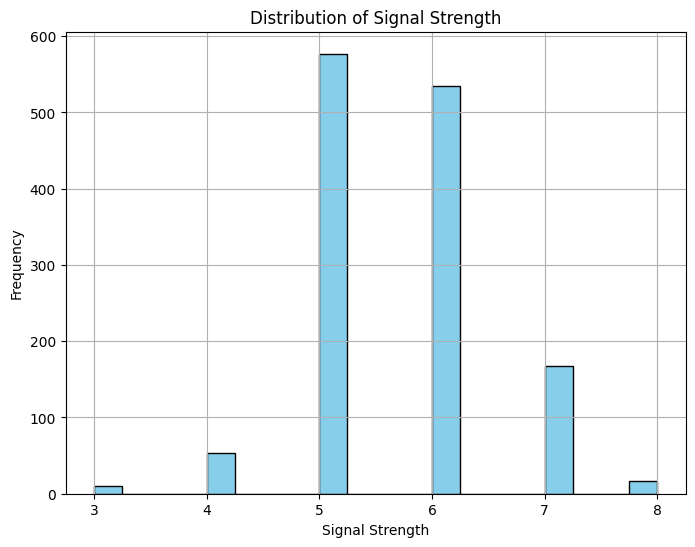

In [33]:
import matplotlib.pyplot as plt

# Plot histogram of Signal_Strength
plt.figure(figsize=(8, 6))
plt.hist(df['Signal_Strength'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

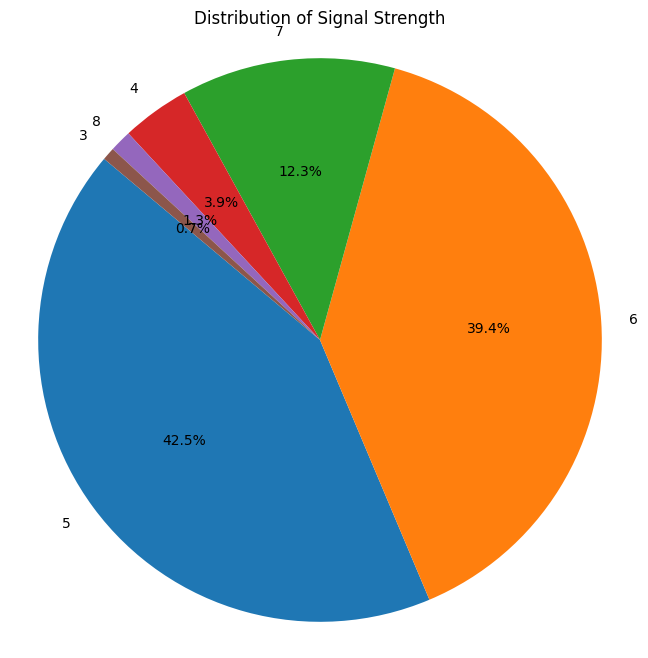

In [34]:
import matplotlib.pyplot as plt

# Calculate value counts of Signal_Strength
signal_strength_counts = df['Signal_Strength'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(signal_strength_counts, labels=signal_strength_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Signal Strength')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

>>### **E. Share insights from the initial data analysis (at least 2)**


---



**1.** Missing value analysis showcases that there are no missing values in the data.

**2.** There were 240 duplicate records in the dataset which have been dropped.

**3.** The target column distribution indicates that 5 is the majority signal with 42.5% cases while 6 too has a major share of 39.4%.

**4.** 7 has a significant share of 12.3% while 4, 8 and 3 have a share of 3.9%, 1.3% and 0.7% respectively.


---



>## **2. Data preprocessing**


---



>>### **A. Split the data into X & Y.**


---



In [35]:
# Extracting features (X) and target variable (Y)
X = df.drop(columns=['Signal_Strength'])  # Drop the target variable column
Y = df['Signal_Strength']  # Select only the target variable column

# Displaying the shapes of X and Y (optional)
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1359, 11)
Shape of Y: (1359,)


>>### **B. Split the data into train & test with 70:30 proportion.**


---



In [36]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with a 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Displaying the shapes of the train and test sets (optional)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)


>>### **C. Print shape of all the 4 variables and verify if train and test data is in sync**


---



In [37]:
# Print shape of all four variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data is in sync
print("\nAre train and test data in sync?")
print("X_train and Y_train:", X_train.shape[0] == Y_train.shape[0])
print("X_test and Y_test:", X_test.shape[0] == Y_test.shape[0])


Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)

Are train and test data in sync?
X_train and Y_train: True
X_test and Y_test: True


The train data and the test data are in sync.

>>### **D. Normalise the train and test data with appropriate method.**


---



In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform test data using parameters from training data
X_test_normalized = scaler.transform(X_test)


# Displaying the shapes of the standardized train and test sets (optional)
print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)

Shape of X_train_normalized: (951, 11)
Shape of X_test_normalized: (408, 11)


>>### **E. Transform Labels into format acceptable by Neural Network**


---



In [39]:
import pandas as pd

# Concatenate Y_train and Y_test to ensure all classes are considered
all_labels = pd.concat([Y_train, Y_test])

# Perform one-hot encoding using pandas get_dummies()
Y_all_encoded = pd.get_dummies(all_labels)

# Split back into Y_train_encoded and Y_test_encoded
Y_train_encoded = Y_all_encoded[:len(Y_train)]
Y_test_encoded = Y_all_encoded[len(Y_train):]

In [40]:
Y_train_encoded

,3,4,5,6,7,8
374,0,0,0,1,0,0
1225,0,0,1,0,0,0
363,0,0,1,0,0,0
1426,0,0,0,1,0,0
89,0,0,1,0,0,0
...,...,...,...,...,...,...
1285,0,0,1,0,0,0
1329,0,0,0,1,0,0
1526,0,0,0,1,0,0
1011,0,0,0,1,0,0


In [41]:
Y_test_encoded

,3,4,5,6,7,8
55,0,0,1,0,0,0
1291,0,0,0,1,0,0
1544,0,0,0,0,1,0
593,0,0,1,0,0,0
1261,0,1,0,0,0,0
...,...,...,...,...,...,...
1305,0,0,1,0,0,0
1120,0,0,0,0,0,1
456,0,0,1,0,0,0
1076,0,0,0,1,0,0


>## **3. Model Training & Evaluation using Neural Network**


---








>>### **A. Design a Neural Network to train a classifier.**


---



In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the number of input features
input_dim = X_train.shape[1]

# Initialize the model
model = Sequential()

# Add the input layer
model.add(Dense(10, input_dim=input_dim, activation='relu'))

# Add a hidden layer
model.add(Dense(10, activation='relu'))

# Add a hidden layer
model.add(Dense(10, activation='relu'))

# Add an output layer with softmax activation for classification
num_classes = 6
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 6)                 66        
                                                                 
Total params: 406 (1.59 KB)
Trainable params: 406 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Input Layer:**The input layer consists of neurons equal to the number of features in the input data. It uses the ReLU (Rectified Linear Activation) activation function.

**Hidden Layers:** There are two hidden layers, each containing 10 neurons. The ReLU activation function is used in both hidden layers.

**Output Layer:** The output layer consists of neurons equal to the number of classes in the classification task, which is 6 in this case. It uses the softmax activation function, which is commonly used for multi-class classification tasks as it outputs probabilities for each class.

**Loss Function:** Categorical cross-entropy is used as the loss function, suitable for multi-class classification tasks.

**Optimizer:** The model is compiled using the ADAM optimizer, which is an efficient and popular optimization algorithm for training neural networks.

**Metrics:** The model is configured to evaluate performance using accuracy as the metric.

>>### **B. Train the classifier using previously designed Architecture**


---



In [43]:
# Train the classifier using the previously designed architecture
history = model.fit(X_train_normalized, Y_train_encoded, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 1.8036 - accuracy: 0.2776 - val_loss: 1.7432 - val_accuracy: 0.4241
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 1.6741 - accuracy: 0.4263 - val_loss: 1.5720 - val_accuracy: 0.4241
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 1.4815 - accuracy: 0.4263 - val_loss: 1.3527 - val_accuracy: 0.4241
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 1.3159 - accuracy: 0.4263 - val_loss: 1.2421 - val_accuracy: 0.4241
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2598 - accuracy: 0.4263 - val_loss: 1.2150 - val_accuracy: 0.4241
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2412 - accuracy: 0.4263 - val_loss: 1.2044 - val_accuracy: 0.4241
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2304 - accuracy: 0.4263 - val_loss: 1.1987 - val_accuracy: 0.4241
Epoch 8/100
3

* The training accuracy reaches around 57.89%, while the validation accuracy reaches around 62.30%.
* The convergence speed seems relatively good as both training and validation losses decrease steadily over epochs.
* The final performance of the model on the validation data is around 62.30% accuracy.
* The model appears to be stable as there are no significant fluctuations in loss or accuracy over epochs.
* Both training and validation accuracies converge to similar values, indicating that the model is not overfitting to the training data.
* While the model achieves a reasonable accuracy, there might still be room for improvement.
* Experimentation with different architectures, hyperparameters, and optimization techniques could potentially lead to better performance.

>>### **C. Plot 2 separate visuals**.


---



>>>#### **i. Training Loss and Validation Loss**


---



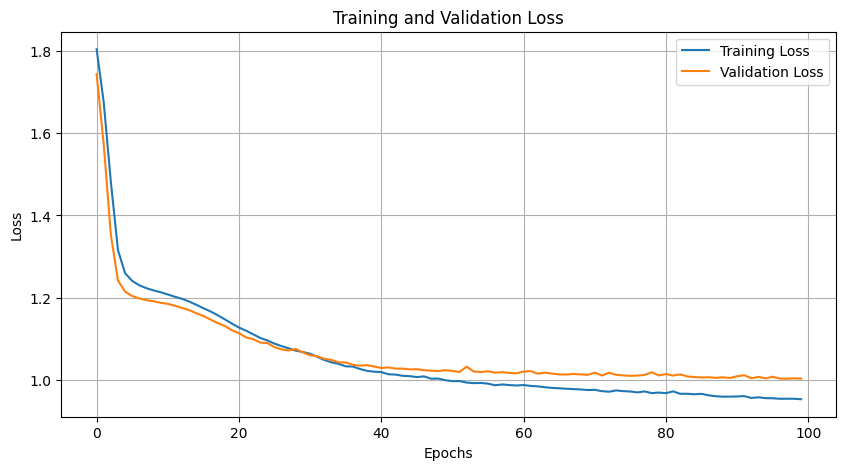

In [44]:
import matplotlib.pyplot as plt

# Plot Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

* The graph shows steady decrease in both the training and validation loss with less fluctuations indicating a stable model.
* The graph for both training and validation data are similar suggesting no overfitting.
* The loss function flattens after approximately 40 epochs suggesting decent convergence time.

>>>#### **ii. Training Accuracy and Validation Accuracy**


---



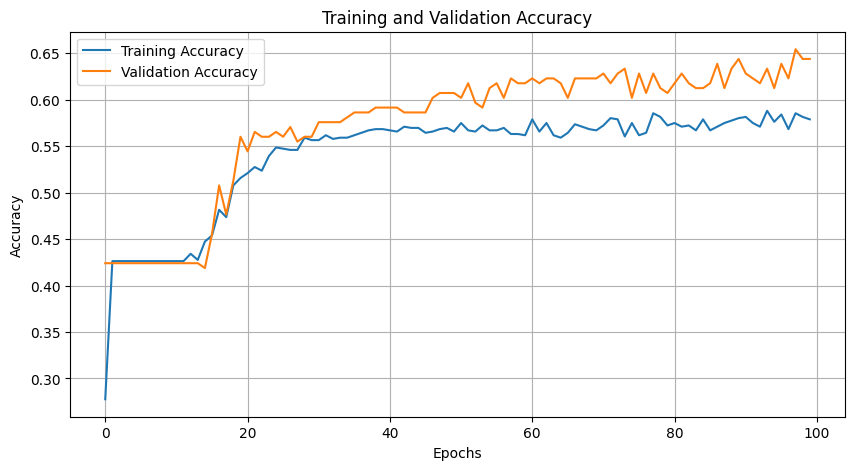

In [45]:
# Plot Training Accuracy and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

* The graph shows little fluctuation indicating a stable model.
* The accuracy for both training and validation data are similar suggesting no overfitting.
* The accuracy for training data becomes constant at approximately 55 to 60% while that of the validation set becomes constant at approximately 60 t0 65%.

>>### **D. Design new architecture/update existing architecture in attempt to improve the performance of the model.**


---



In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop

# Define the number of input features
input_dim = X_train.shape[1]

# Initialize the model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_dim=input_dim, kernel_initializer='he_uniform', activation='relu'))

# Add a hidden layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Add a hidden layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Add a hidden layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Add an output layer with softmax activation for classification
num_classes = 6
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                768       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 64)               

* The updated neural network architecture features four hidden layers with 64 neurons each, using ReLU activation and He uniform weight initialization.

* Batch normalization is applied after each hidden layer to stabilize training and accelerate convergence.

* The model is optimized with the Adam optimizer using a learning rate of 0.01.

>>### **E. Plot visuals as in Q3.C and share insights about difference observed in both the models.**


---



In [47]:
# Train the updated model
history_updated = model.fit(X_train_normalized, Y_train_encoded, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
14/14 [==============================] - 2s 24ms/step - loss: 1.5774 - accuracy: 0.4620 - val_loss: 1.5062 - val_accuracy: 0.4896
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.1185 - accuracy: 0.5684 - val_loss: 1.1528 - val_accuracy: 0.5625
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9631 - accuracy: 0.5953 - val_loss: 1.1699 - val_accuracy: 0.5521
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9244 - accuracy: 0.6070 - val_loss: 1.1591 - val_accuracy: 0.5625
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8873 - accuracy: 0.6292 - val_loss: 1.1528 - val_accuracy: 0.4688
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8920 - accuracy: 0.6175 - val_loss: 1.2045 - val_accuracy: 0.4479
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9003 - accuracy: 0.6339 - val_loss: 1.2259 - val_accuracy: 0.4792
Epoch 8/100


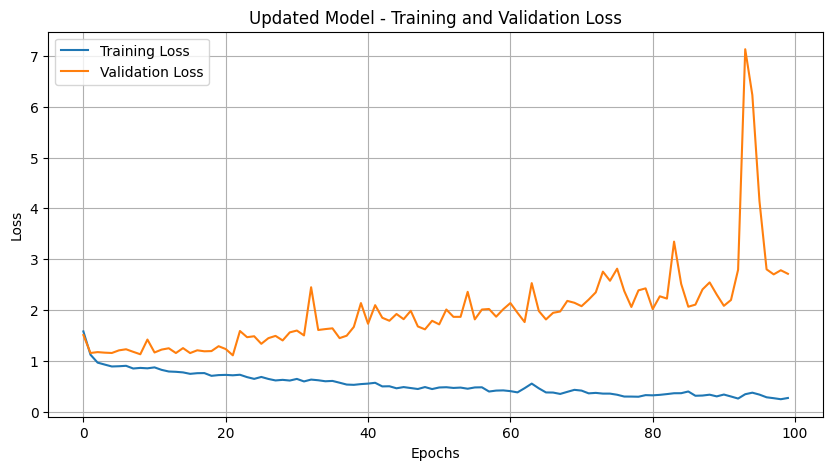

In [48]:
# Plot Training Loss and Validation Loss (Updated Model)
plt.figure(figsize=(10, 5))
plt.plot(history_updated.history['loss'], label='Training Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.title('Updated Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

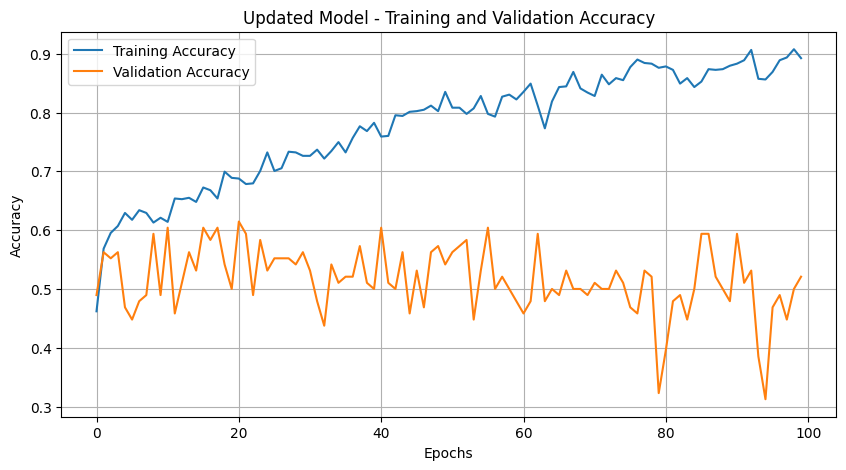

In [49]:
# Plot Training Accuracy and Validation Accuracy (Updated Model)
plt.figure(figsize=(10, 5))
plt.plot(history_updated.history['accuracy'], label='Training Accuracy')
plt.plot(history_updated.history['val_accuracy'], label='Validation Accuracy')
plt.title('Updated Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

* The enhanced model demonstrates a faster initial decrease in loss during the first few epochs, suggesting quicker learning at the beginning of training.
* The enhanced model achieves a higher peak accuracy on the validation set of 60.42% on the 56th epoch.
* However though the training accuracy of the model improves to 90.76%, the validation accuracy remians constant between 50 to 60% with lots of flucatuations.
* Despite the higher validation accuracy, the enhanced model exhibits increased overfitting compared to the previous model, which is evident from the larger gap between training and validation accuracy in the later epochs.
* Moreover the large gap between training and validation set as well as the fluctuations in the accuracy of the training data indicate that the model is quite unstable, despite high train accuracy.
* While it performs better on the training data compared to the previous model, it performs not so well on the validation set compared to the previous model.


# **PART B**


---



> **DOMAIN:** Autonomous Vehicles


---



> **CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.

> The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.

> While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.

> The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.


---



> **DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

> 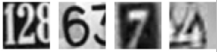

> Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

> The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

> **Acknowledgement:** Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.


---



 > **PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.


---



> **STEPS AND TASKS:**


---



>## **1. Data Import and Exploration**


---



>>### **A. Read the .h5 file and assign to a variable.**


---



In [27]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import h5py

# Specify the path to the .h5 file in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Read the .h5 file and assign it to a variable
with h5py.File(file_path, 'r') as file:
    # Explore the keys in the dataset
    print("Keys in the dataset:", list(file.keys()))

    # Access the training, validation, and test data and labels
    X_train = file['X_train'][:]
    y_train = file['y_train'][:]
    X_val = file['X_val'][:]
    y_val = file['y_val'][:]
    X_test = file['X_test'][:]
    y_test = file['y_test'][:]

# Display basic information about the dataset
print("Shape of training data:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of validation data:", X_val.shape)
print("Shape of validation labels:", y_val.shape)
print("Shape of test data:", X_test.shape)
print("Shape of test labels:", y_test.shape)

Keys in the dataset: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of training data: (42000, 32, 32)
Shape of training labels: (42000,)
Shape of validation data: (60000, 32, 32)
Shape of validation labels: (60000,)
Shape of test data: (18000, 32, 32)
Shape of test labels: (18000,)


>>### **B. Print all the keys from the .h5 file.**


---



In [29]:
# Read the .h5 file and print all the keys
with h5py.File(file_path, 'r') as file:
    # Print all the keys in the dataset
    print("Keys in the dataset:", list(file.keys()))

Keys in the dataset: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


>>### **C. Split the data into X_train, X_test, Y_train, Y_test.**


---



In [30]:
# Read the .h5 file and split the data into X_train, X_test, y_train, y_test
with h5py.File(file_path, 'r') as file:
    X_train = file['X_train'][:]
    y_train = file['y_train'][:]
    X_test = file['X_test'][:]
    y_test = file['y_test'][:]

# Display shapes of the data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


>## **2. Data Visualisation and preprocessing**


---



>>### **A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**


---



In [31]:
# Print the shape of each data split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


X and Y is in sync.

>>### **B. Visualise first 10 images in train data and print its corresponding labels.**


---



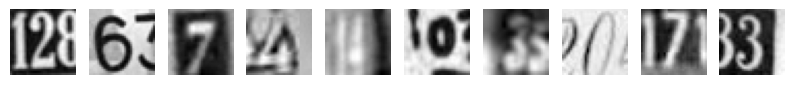

Corresponding labels: [2 6 7 4 4 0 3 0 7 3]


In [32]:
import matplotlib.pyplot as plt

# Visualize the first 10 images in the training data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Corresponding labels:", y_train[:10])

>>### **C. Reshape all the images with appropriate shape update the data in same variable.**


---



In [33]:
import numpy as np

# Reshape the images in the training and test data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Display the new shapes of the data
print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

New shape of X_train: (42000, 1024)
New shape of X_test: (18000, 1024)


>>### **D. Normalise the images i.e. Normalise the pixel values.**


---



In [34]:
# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

>>### **E. Transform Labels into format acceptable by Neural Network.**


---



In [35]:
from keras.utils import to_categorical

# Number of classes
num_classes = 10  # Assuming there are 10 classes (0-9 digits)

# Perform one-hot encoding on the labels
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

>>### **F. Print total Number of classes in the Dataset.**


---



In [36]:
# Find the total number of classes in the dataset
num_classes = len(np.unique(y_train))
print("Total number of classes in the dataset:", num_classes)


Total number of classes in the dataset: 10


>## **3. Model Training & Evaluation using Neural Network.**


---



>>### **A. Design a Neural Network to train a classifier.**


---



In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Define the number of input features
input_shape = X_train.shape[1:]
# Define the number of classes
num_classes = len(np.unique(y_train))

# Initialize the model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_shape=input_shape, kernel_initializer='he_uniform', activation='sigmoid'))

# Add a hidden layer
model.add(Dense(64, activation='sigmoid', kernel_initializer='he_uniform'))

# Add a hidden layer
model.add(Dense(64, activation='sigmoid', kernel_initializer='he_uniform'))

# Add an output layer with softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                65600     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 74570 (291.29 KB)
Trainable params: 74570 (291.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* The defined neural network architecture consists of three dense (fully connected) layers.

* The input layer has 64 neurons and uses the sigmoid activation function.

* Two hidden layers with 64 neurons each follow, also using the sigmoid activation function.

* Finally, the output layer has the number of neurons corresponding to the number of classes, employing the softmax activation function for classification.

* The model is compiled with categorical crossentropy loss and Adam optimizer, with accuracy as the metric for evaluation.

>>### **B. Train the classifier using previously designed Architecture (Use best suitable parameters).**


---



In [38]:
# Train the classifier
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_train, y_train_encoded))

Epoch 1/100
1313/1313 [==============================] - 9s 6ms/step - loss: 2.2298 - accuracy: 0.1457 - val_loss: 2.0416 - val_accuracy: 0.2316
Epoch 2/100
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8247 - accuracy: 0.3321 - val_loss: 1.6633 - val_accuracy: 0.4155
Epoch 3/100
1313/1313 [==============================] - 6s 5ms/step - loss: 1.5948 - accuracy: 0.4357 - val_loss: 1.5236 - val_accuracy: 0.4719
Epoch 4/100
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4762 - accuracy: 0.4912 - val_loss: 1.4090 - val_accuracy: 0.5306
Epoch 5/100
1313/1313 [==============================] - 7s 5ms/step - loss: 1.3581 - accuracy: 0.5501 - val_loss: 1.2850 - val_accuracy: 0.5807
Epoch 6/100
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2652 - accuracy: 0.5806 - val_loss: 1.2120 - val_accuracy: 0.6009
Epoch 7/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1998 - accuracy: 0.6044 - val_loss: 1.1744 - val_ac

* The model achieved a final training accuracy of approximately 84.98% and a validation accuracy of around 86.00% after 100 epochs of training.

* The training loss decreased steadily over the epochs, indicating that the model was learning effectively.

* There is no significant gap between the training and validation accuracies, and also not much fluctuation in the accuracy values suggesting a stable model.

* The model demonstrates decent performance overall.

>>### **C. Evaluate performance of the model with appropriate metrics.**


---



563/563 [==============================] - 1s 2ms/step
Accuracy: 0.8028888888888889

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1814
           1       0.76      0.85      0.80      1828
           2       0.90      0.75      0.82      1803
           3       0.81      0.73      0.76      1719
           4       0.84      0.85      0.85      1812
           5       0.75      0.82      0.78      1768
           6       0.80      0.79      0.80      1832
           7       0.87      0.84      0.85      1808
           8       0.76      0.74      0.75      1812
           9       0.77      0.79      0.78      1804

    accuracy                           0.80     18000
   macro avg       0.81      0.80      0.80     18000
weighted avg       0.81      0.80      0.80     18000


Confusion Matrix:


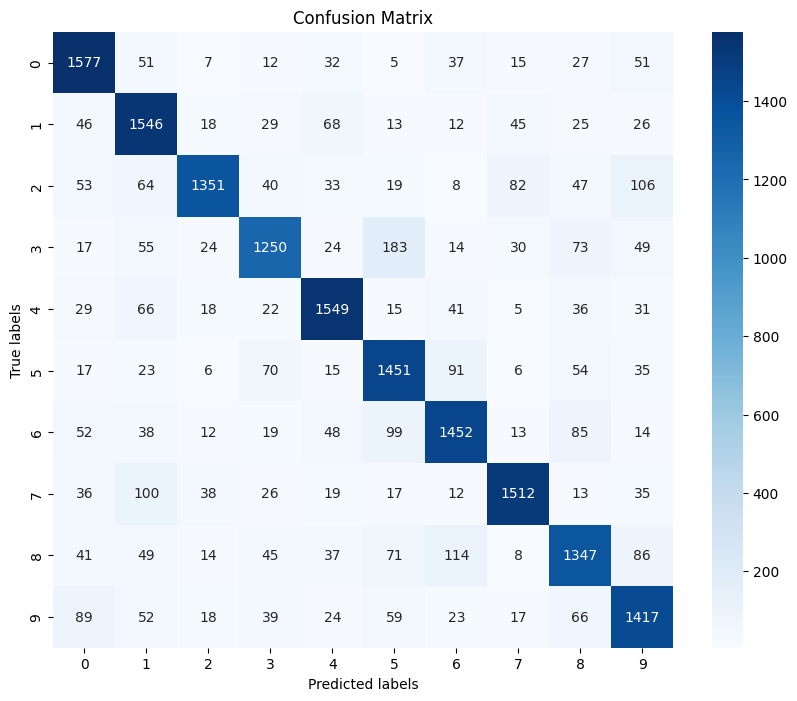

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the classes for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_original = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_original, y_pred_classes)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_original, y_pred_classes)

# Plot confusion matrix as heatmap with proper labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

* The model achieved an accuracy of approximately 80.29% on the test data, indicating that it correctly classified around 80.29% of the images. The model's performance is relatively good.

* The precision and recall scores vary across different classes, with some classes having higher precision and recall than others. For example, class 2 (label 2) has the highest precision of 0.90, while class 3 (label 3) has the lowest recall of 0.73. However the scores for all the classes are decent.

>>### **D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**


---



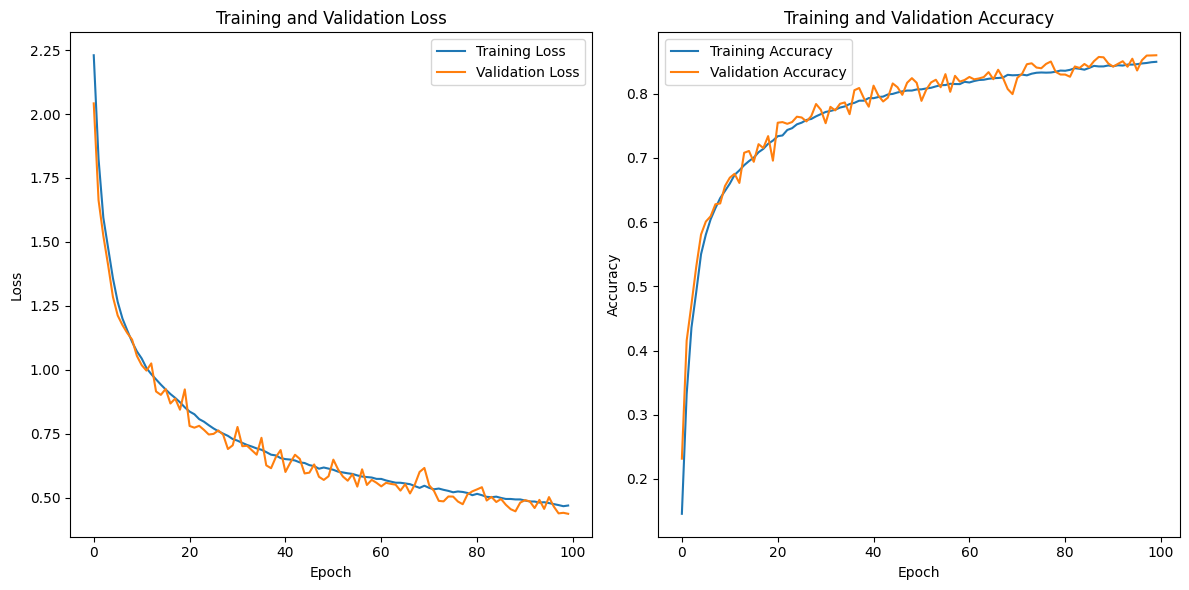

In [40]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


* The training loss and validation loss steadily decreases over epochs, indicating that the model is effectively learning from the training data.

* The training accuracy and validation accuracy steadily increases over epochs, which is expected as the model learns from the training data.

* The convergence of training and validation loss and accuracy indicates that the model is learning well from the training data initially.

* The final test accuracy of approximately 80.29%, which is great and aligns with the validation accuracy trends, indicating that the model's performance on unseen data is consistent with its performance on the validation set.

* The graph showcases little fluctuations in loss or accuracy suggesting a stable model and the overlap of the training and the validation plots indicate no overfitting.
